## 1. Import thư viện cần thiết

## 2. Load và khám phá dữ liệu (Data Exploration)

PHÂN TÍCH PHÂN BỐ NHÃN

Số lượng mỗi loại:
rank
Normal    108
Good       85
Name: count, dtype: int64

Tỷ lệ phần trăm:
Normal: 55.96%
Good: 44.04%


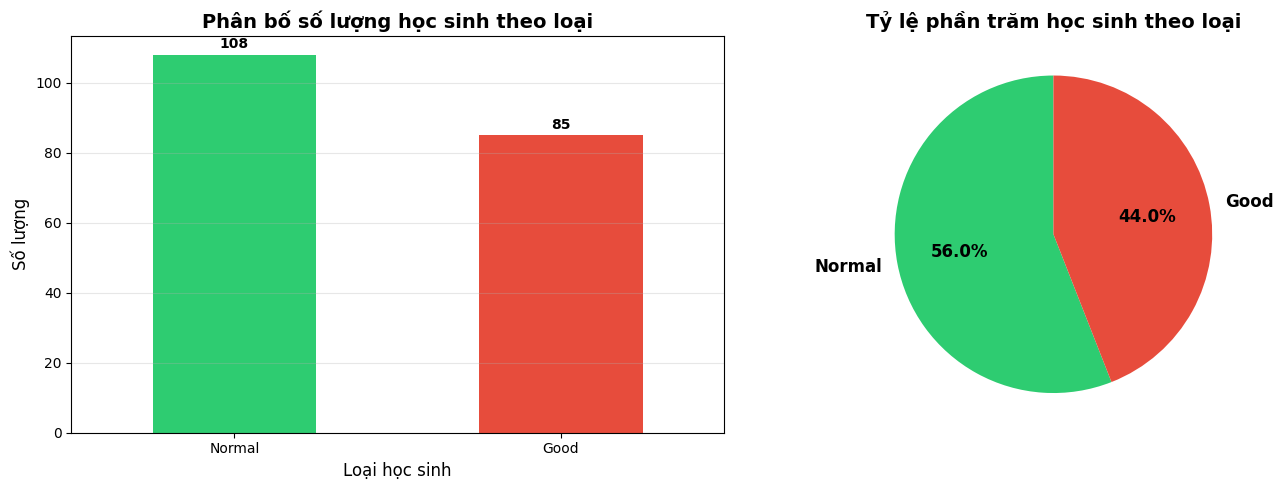

In [24]:
# Phân tích phân bố của nhãn (label distribution)
print("=" * 60)
print("PHÂN TÍCH PHÂN BỐ NHÃN")
print("=" * 60)

# Đếm số lượng từng loại
rank_counts = df['rank'].value_counts()
print("\nSố lượng mỗi loại:")
print(rank_counts)

# Tính tỷ lệ phần trăm
rank_percentage = df['rank'].value_counts(normalize=True) * 100
print("\nTỷ lệ phần trăm:")
for rank, percent in rank_percentage.items():
    print(f"{rank}: {percent:.2f}%")

# Vẽ biểu đồ phân bố
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột (bar chart)
rank_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Phân bố số lượng học sinh theo loại', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loại học sinh', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Thêm số lượng lên trên mỗi cột
for i, v in enumerate(rank_counts):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Biểu đồ tròn (pie chart)
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(rank_counts, labels=rank_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Tỷ lệ phần trăm học sinh theo loại', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Tiền xử lý dữ liệu (Data Preprocessing)

## 4. Chia dữ liệu thành Train/Test (70/30)

In [28]:
def create_model_1():
    """
    Tạo Model 1: Neural Network đơn giản với 2 hidden layers

    Kiến trúc:
    - Input layer: 2 neurons (gpa, study_hours)
    - Hidden layer 1: 16 neurons, ReLU activation
    - Hidden layer 2: 8 neurons, ReLU activation
    - Output layer: 1 neuron, Sigmoid activation (phân loại nhị phân)

    Returns:
        model: TensorFlow Sequential model
    """
    model = Sequential(name='Model_1_Baseline')

    # Hidden layer 1: 16 neurons với ReLU activation
    # ReLU (Rectified Linear Unit): f(x) = max(0, x)
    # Giúp model học được các pattern phi tuyến
    model.add(Dense(
        units=16,  # Số neurons
        activation='relu',  # Hàm kích hoạt
        input_shape=(2,),  # Input có 2 features
        name='hidden_layer_1'
    ))

    # Hidden layer 2: 8 neurons với ReLU activation
    # Layer thứ 2 giúp model học được representation phức tạp hơn
    model.add(Dense(
        units=8,
        activation='relu',
        name='hidden_layer_2'
    ))

    # Output layer: 1 neuron với Sigmoid activation
    # Sigmoid: f(x) = 1 / (1 + e^(-x)), output trong khoảng [0, 1]
    # Diễn giải như xác suất: 0 = Normal, 1 = Good
    model.add(Dense(
        units=1,
        activation='sigmoid',  # Bắt buộc theo yêu cầu đề bài
        name='output_layer'
    ))

    return model

# Tạo model
model_1 = create_model_1()

# Compile model với optimizer và loss function
# Adam optimizer: thuật toán tối ưu adaptive learning rate
# Binary crossentropy: loss function cho phân loại nhị phân
# Metrics: accuracy để đánh giá trong quá trình training
model_1.compile(
    optimizer='adam',  # Optimizer tối ưu weights
    loss='binary_crossentropy',  # Hàm loss cho bài toán phân loại nhị phân
    metrics=['accuracy']  # Metric để theo dõi
)

# In ra thông tin kiến trúc model
print("=" * 60)
print("KIẾN TRÚC MODEL 1 - BASELINE")
print("=" * 60)
model_1.summary()

# Tính tổng số parameters
total_params = model_1.count_params()
print(f"\nTổng số parameters: {total_params:,}")

KIẾN TRÚC MODEL 1 - BASELINE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model_1_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)


Tổng số parameters: 193


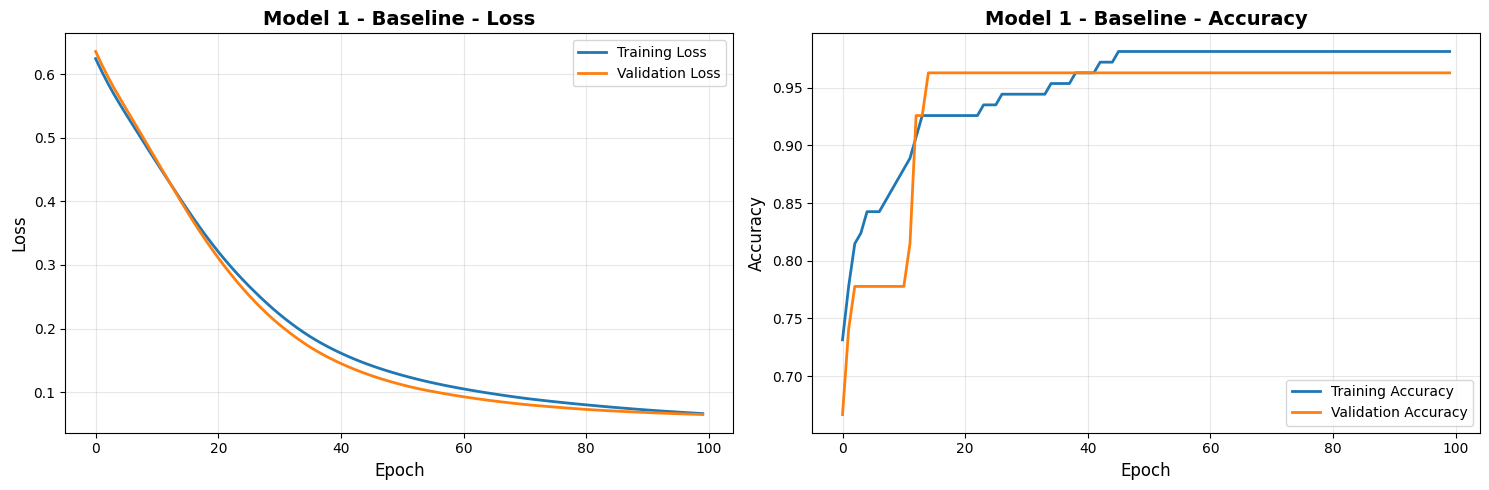


Best Validation Accuracy: 0.9630 (Epoch 15)


In [30]:
# Vẽ biểu đồ training history cho Model 1
def plot_training_history(history, model_name):
    """
    Vẽ biểu đồ loss và accuracy trong quá trình training

    Args:
        history: History object từ model.fit()
        model_name: Tên model để hiển thị trong title
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Loss
    axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # In ra best validation accuracy
    best_val_acc = max(history.history['val_accuracy'])
    best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    print(f"\nBest Validation Accuracy: {best_val_acc:.4f} (Epoch {best_epoch})")

# Vẽ biểu đồ cho Model 1
plot_training_history(history_1, 'Model 1 - Baseline')

ĐÁNH GIÁ MODEL 1 TRÊN TEST SET

Test Loss: 0.0501
Test Accuracy: 0.9828 (98.28%)

Accuracy trên test set: 0.9828 (98.28%)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Good     0.9630    1.0000    0.9811        26
      Normal     1.0000    0.9688    0.9841        32

    accuracy                         0.9828        58
   macro avg     0.9815    0.9844    0.9826        58
weighted avg     0.9834    0.9828    0.9828        58


CONFUSION MATRIX
[[26  0]
 [ 1 31]]


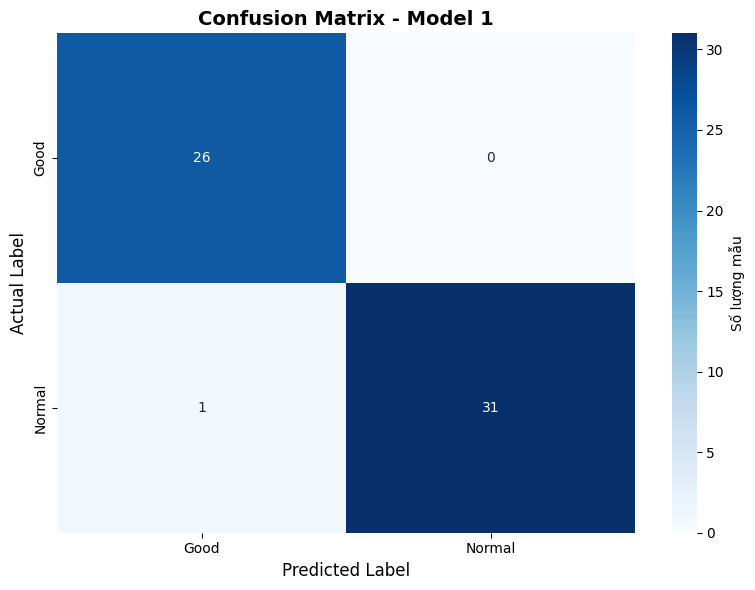


Phân tích chi tiết:
True Negative (Normal dự đoán đúng): 26
False Positive (Normal dự đoán sai thành Good): 0
False Negative (Good dự đoán sai thành Normal): 1
True Positive (Good dự đoán đúng): 31


In [31]:
# Evaluate Model 1 trên test set
print("=" * 60)
print("ĐÁNH GIÁ MODEL 1 TRÊN TEST SET")
print("=" * 60)

# Tính loss và accuracy trên test set
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Loss: {test_loss_1:.4f}")
print(f"Test Accuracy: {test_accuracy_1:.4f} ({test_accuracy_1*100:.2f}%)")

# Dự đoán trên test set
# predict() trả về xác suất [0, 1]
y_pred_proba_1 = model_1.predict(X_test, verbose=0)

# Chuyển xác suất thành class (0 hoặc 1)
# Nếu xác suất >= 0.5 -> class 1 (Good), ngược lại -> class 0 (Normal)
y_pred_1 = (y_pred_proba_1 >= 0.5).astype(int).flatten()

# Import metrics để đánh giá chi tiết
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Tính accuracy
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"\nAccuracy trên test set: {accuracy_1:.4f} ({accuracy_1*100:.2f}%)")

# Classification Report
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(
    y_test,
    y_pred_1,
    target_names=label_encoder.classes_,
    digits=4
))

# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
print("\n" + "=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)
print(cm_1)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Số lượng mẫu'}
)
plt.title('Confusion Matrix - Model 1', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Phân tích chi tiết confusion matrix
tn, fp, fn, tp = cm_1.ravel()
print("\nPhân tích chi tiết:")
print(f"True Negative (Normal dự đoán đúng): {tn}")
print(f"False Positive (Normal dự đoán sai thành Good): {fp}")
print(f"False Negative (Good dự đoán sai thành Normal): {fn}")
print(f"True Positive (Good dự đoán đúng): {tp}")

In [32]:
def predict_student(model, gpa, study_hours, scaler, label_encoder):
    """
    Dự đoán loại học sinh dựa trên GPA và Study Hours
    Hiển thị kết quả với tỷ lệ % theo yêu cầu

    Args:
        model: Model đã train
        gpa: Điểm GPA của học sinh
        study_hours: Số giờ học của học sinh
        scaler: StandardScaler đã fit với training data
        label_encoder: LabelEncoder để decode nhãn

    Returns:
        predicted_class: Class dự đoán (Good/Normal)
        probability: Xác suất dự đoán
    """
    # Chuẩn bị input
    input_data = np.array([[gpa, study_hours]])

    # Chuẩn hóa input (phải dùng scaler đã fit với training data)
    input_scaled = scaler.transform(input_data)

    # Dự đoán xác suất
    probability = model.predict(input_scaled, verbose=0)[0][0]

    # Chuyển đổi xác suất thành class
    # probability >= 0.5 -> Good (1), ngược lại -> Normal (0)
    predicted_label = 1 if probability >= 0.5 else 0
    predicted_class = label_encoder.inverse_transform([predicted_label])[0]

    # In kết quả theo format yêu cầu
    print(f"\n{'='*60}")
    print(f"Thông tin học sinh:")
    print(f"  - GPA: {gpa}")
    print(f"  - Study Hours: {study_hours}")
    print(f"{'='*60}")
    print(f"Kết quả dự đoán:")

    if predicted_class == 'Good':
        # Nếu dự đoán là Good, hiển thị xác suất là Good
        percentage = probability * 100
        print(f"  {percentage:.2f}% là học sinh {predicted_class}")
    else:
        # Nếu dự đoán là Normal, hiển thị xác suất là Normal (1 - probability)
        percentage = (1 - probability) * 100
        print(f"  {percentage:.2f}% là học sinh {predicted_class}")

    print(f"{'='*60}\n")

    return predicted_class, probability

# Demo với một số mẫu từ test set
print("=" * 60)
print("DEMO DỰ ĐOÁN VỚI MODEL 1")
print("=" * 60)

# Lấy 5 mẫu ngẫu nhiên từ test set
np.random.seed(42)
random_indices = np.random.choice(len(X_test), size=5, replace=False)

for i, idx in enumerate(random_indices, 1):
    # Lấy original values (trước khi scale) từ X_test
    gpa_scaled = X_test[idx, 0]
    study_hours_scaled = X_test[idx, 1]

    # Inverse transform để lấy giá trị gốc
    original_values = scaler.inverse_transform([[gpa_scaled, study_hours_scaled]])
    gpa_original = original_values[0, 0]
    study_hours_original = original_values[0, 1]

    # Lấy actual class
    actual_label = y_test[idx]
    actual_class = label_encoder.inverse_transform([actual_label])[0]

    print(f"\nMẫu {i}:")
    print(f"Actual class: {actual_class}")

    # Dự đoán
    predicted_class, probability = predict_student(
        model_1,
        gpa_original,
        study_hours_original,
        scaler,
        label_encoder
    )

    # So sánh
    if predicted_class == actual_class:
        print("Dự đoán ĐÚNG!")
    else:
        print("Dự đoán SAI!")

print("\n" + "=" * 60)

DEMO DỰ ĐOÁN VỚI MODEL 1

Mẫu 1:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.825
  - Study Hours: 20.0
Kết quả dự đoán:
  0.64% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 2:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.925
  - Study Hours: 15.0
Kết quả dự đoán:
  0.12% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 3:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.85
  - Study Hours: 10.0
Kết quả dự đoán:
  0.43% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 4:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.89
  - Study Hours: 12.0
Kết quả dự đoán:
  0.22% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 5:
Actual class: Normal

Thông tin học sinh:
  - GPA: 3.6
  - Study Hours: 24.0
Kết quả dự đoán:
  3.70% là học sinh Normal

Dự đoán ĐÚNG!



In [33]:
def create_model_2():
    """
    Tạo Model 2: Neural Network cải tiến với kiến trúc sâu hơn và Dropout

    Cải tiến so với Model 1:
    - Thêm 1 hidden layer (tổng 3 hidden layers)
    - Số neurons nhiều hơn ở các layer đầu
    - Sử dụng Dropout để tránh overfitting

    Kiến trúc:
    - Input layer: 2 neurons (gpa, study_hours)
    - Hidden layer 1: 32 neurons, ReLU activation
    - Dropout 1: 30% neurons bị tắt ngẫu nhiên
    - Hidden layer 2: 16 neurons, ReLU activation
    - Dropout 2: 20% neurons bị tắt ngẫu nhiên
    - Hidden layer 3: 8 neurons, ReLU activation
    - Output layer: 1 neuron, Sigmoid activation

    Returns:
        model: TensorFlow Sequential model
    """
    model = Sequential(name='Model_2_Improved')

    # Hidden layer 1: 32 neurons với ReLU
    # Nhiều neurons hơn để học được nhiều features phức tạp hơn
    model.add(Dense(
        units=32,
        activation='relu',
        input_shape=(2,),
        name='hidden_layer_1'
    ))

    # Dropout layer 1: tắt ngẫu nhiên 30% neurons
    # Dropout giúp tránh overfitting bằng cách ngăn model học thuộc lòng training data
    # Trong training: 30% neurons sẽ được set = 0 ngẫu nhiên
    # Trong inference: tất cả neurons hoạt động nhưng output được scale
    model.add(Dropout(
        rate=0.3,  # 30% neurons bị tắt
        name='dropout_1'
    ))

    # Hidden layer 2: 16 neurons với ReLU
    model.add(Dense(
        units=16,
        activation='relu',
        name='hidden_layer_2'
    ))

    # Dropout layer 2: tắt ngẫu nhiên 20% neurons
    model.add(Dropout(
        rate=0.2,  # 20% neurons bị tắt
        name='dropout_2'
    ))

    # Hidden layer 3: 8 neurons với ReLU
    # Layer thứ 3 để tinh chỉnh representation cuối cùng
    model.add(Dense(
        units=8,
        activation='relu',
        name='hidden_layer_3'
    ))

    # Output layer: 1 neuron với Sigmoid
    # Bắt buộc theo yêu cầu đề bài
    model.add(Dense(
        units=1,
        activation='sigmoid',
        name='output_layer'
    ))

    return model

# Tạo Model 2
model_2 = create_model_2()

# Compile model
model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# In ra kiến trúc model
print("=" * 60)
print("KIẾN TRÚC MODEL 2 - IMPROVED WITH DROPOUT")
print("=" * 60)
model_2.summary()

# Tính tổng số parameters
total_params_2 = model_2.count_params()
print(f"\nTổng số parameters: {total_params_2:,}")
print(f"So với Model 1: {total_params_2 - total_params:+,} parameters")

KIẾN TRÚC MODEL 2 - IMPROVED WITH DROPOUT


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model_2_Improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)


Tổng số parameters: 769
So với Model 1: +576 parameters


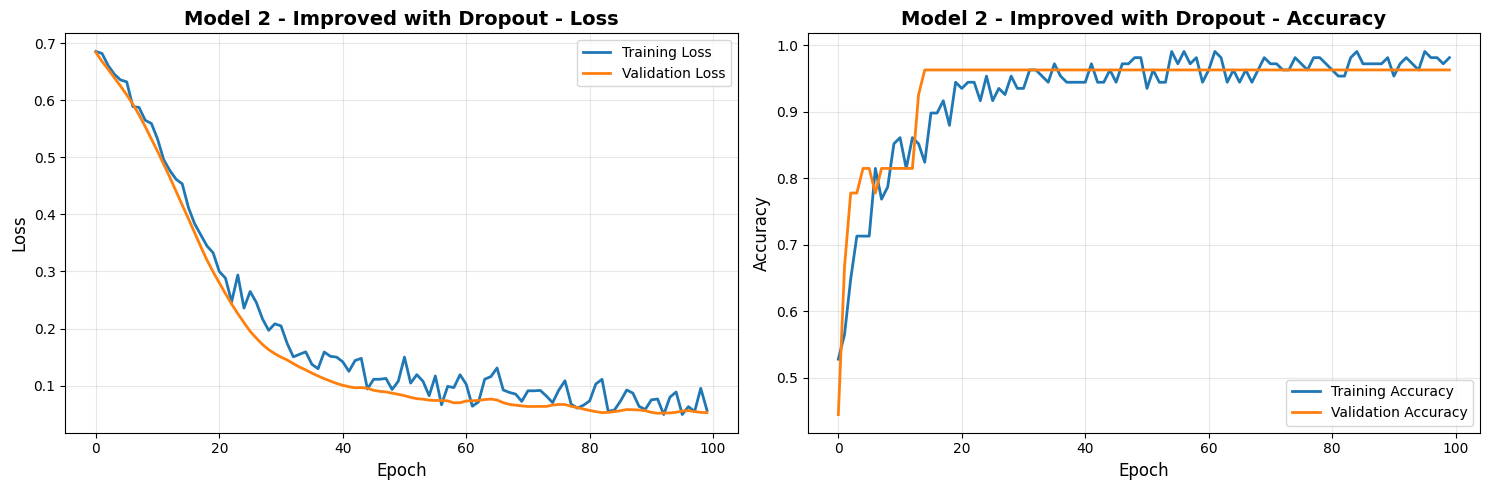


Best Validation Accuracy: 0.9630 (Epoch 15)


In [35]:
# Vẽ biểu đồ training history cho Model 2
plot_training_history(history_2, 'Model 2 - Improved with Dropout')

ĐÁNH GIÁ MODEL 2 TRÊN TEST SET

Test Loss: 0.0291
Test Accuracy: 0.9828 (98.28%)



Accuracy trên test set: 0.9828 (98.28%)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Good     0.9630    1.0000    0.9811        26
      Normal     1.0000    0.9688    0.9841        32

    accuracy                         0.9828        58
   macro avg     0.9815    0.9844    0.9826        58
weighted avg     0.9834    0.9828    0.9828        58


CONFUSION MATRIX
[[26  0]
 [ 1 31]]


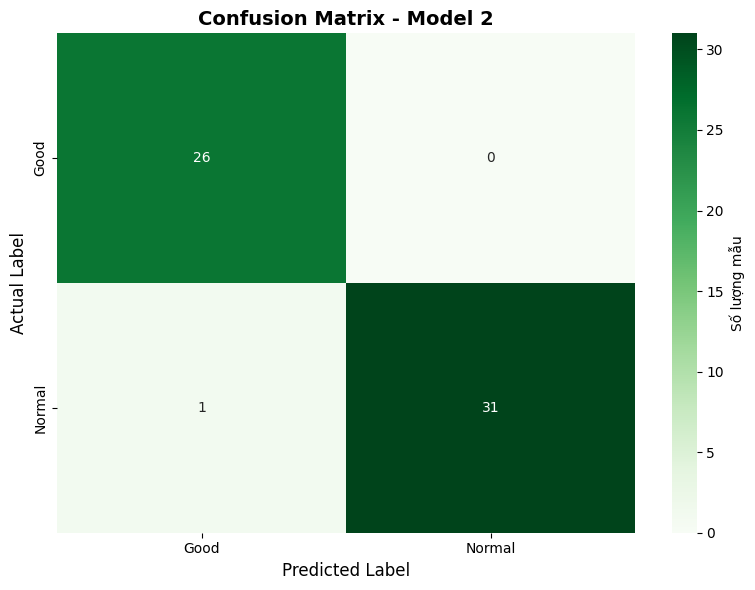


Phân tích chi tiết:
True Negative (Normal dự đoán đúng): 26
False Positive (Normal dự đoán sai thành Good): 0
False Negative (Good dự đoán sai thành Normal): 1
True Positive (Good dự đoán đúng): 31


In [36]:
# Evaluate Model 2 trên test set
print("=" * 60)
print("ĐÁNH GIÁ MODEL 2 TRÊN TEST SET")
print("=" * 60)

# Tính loss và accuracy trên test set
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Loss: {test_loss_2:.4f}")
print(f"Test Accuracy: {test_accuracy_2:.4f} ({test_accuracy_2*100:.2f}%)")

# Dự đoán trên test set
y_pred_proba_2 = model_2.predict(X_test, verbose=0)
y_pred_2 = (y_pred_proba_2 >= 0.5).astype(int).flatten()

# Tính accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"\nAccuracy trên test set: {accuracy_2:.4f} ({accuracy_2*100:.2f}%)")

# Classification Report
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(
    y_test,
    y_pred_2,
    target_names=label_encoder.classes_,
    digits=4
))

# Confusion Matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
print("\n" + "=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)
print(cm_2)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_2,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Số lượng mẫu'}
)
plt.title('Confusion Matrix - Model 2', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Phân tích chi tiết confusion matrix
tn, fp, fn, tp = cm_2.ravel()
print("\nPhân tích chi tiết:")
print(f"True Negative (Normal dự đoán đúng): {tn}")
print(f"False Positive (Normal dự đoán sai thành Good): {fp}")
print(f"False Negative (Good dự đoán sai thành Normal): {fn}")
print(f"True Positive (Good dự đoán đúng): {tp}")

In [37]:
# Demo với Model 2
print("=" * 60)
print("DEMO DỰ ĐOÁN VỚI MODEL 2")
print("=" * 60)

for i, idx in enumerate(random_indices, 1):
    # Lấy original values (trước khi scale) từ X_test
    gpa_scaled = X_test[idx, 0]
    study_hours_scaled = X_test[idx, 1]

    # Inverse transform để lấy giá trị gốc
    original_values = scaler.inverse_transform([[gpa_scaled, study_hours_scaled]])
    gpa_original = original_values[0, 0]
    study_hours_original = original_values[0, 1]

    # Lấy actual class
    actual_label = y_test[idx]
    actual_class = label_encoder.inverse_transform([actual_label])[0]

    print(f"\nMẫu {i}:")
    print(f"Actual class: {actual_class}")

    # Dự đoán
    predicted_class, probability = predict_student(
        model_2,
        gpa_original,
        study_hours_original,
        scaler,
        label_encoder
    )

    # So sánh
    if predicted_class == actual_class:
        print("Dự đoán ĐÚNG!")
    else:
        print("Dự đoán SAI!")

print("\n" + "=" * 60)

DEMO DỰ ĐOÁN VỚI MODEL 2

Mẫu 1:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.825
  - Study Hours: 20.0
Kết quả dự đoán:
  0.08% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 2:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.925
  - Study Hours: 15.0
Kết quả dự đoán:
  0.00% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 3:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.85
  - Study Hours: 10.0
Kết quả dự đoán:
  0.04% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 4:
Actual class: Good

Thông tin học sinh:
  - GPA: 3.89
  - Study Hours: 12.0
Kết quả dự đoán:
  0.01% là học sinh Good

Dự đoán ĐÚNG!

Mẫu 5:
Actual class: Normal

Thông tin học sinh:
  - GPA: 3.6
  - Study Hours: 24.0
Kết quả dự đoán:
  2.62% là học sinh Normal

Dự đoán ĐÚNG!



SO SÁNH HIỆU SUẤT 2 MODELS

        Metric Model 1 (Baseline) Model 2 (Improved) Improvement
    Test Loss             0.0501             0.0291     +0.0210
Test Accuracy    0.9828 (98.28%)    0.9828 (98.28%)      +0.00%
   Parameters                193                769        +576


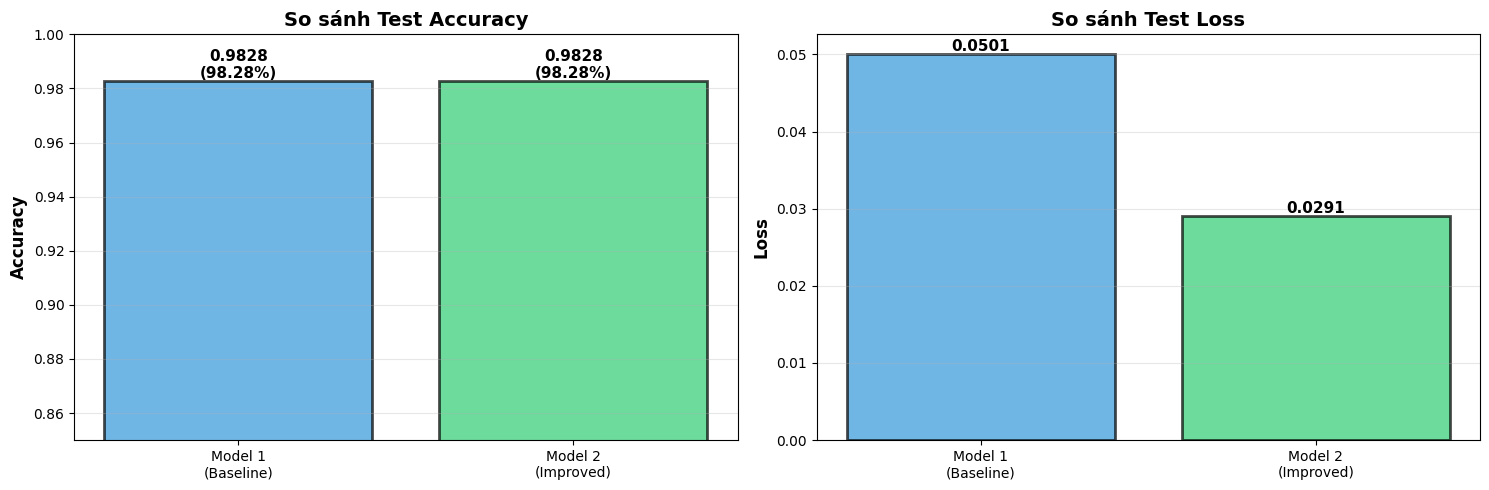


KẾT LUẬN

= Model 2 có accuracy TƯƠNG ĐƯƠNG với Model 1
Model 2 GIẢM được 0.0210 về loss so với Model 1

Model 2 có +576 parameters so với Model 1
   Kiến trúc phức tạp hơn với Dropout giúp tránh overfitting



In [38]:
# So sánh hiệu suất của 2 models
print("=" * 70)
print("SO SÁNH HIỆU SUẤT 2 MODELS")
print("=" * 70)

# Tạo bảng so sánh
comparison_data = {
    'Metric': ['Test Loss', 'Test Accuracy', 'Parameters'],
    'Model 1 (Baseline)': [
        f"{test_loss_1:.4f}",
        f"{test_accuracy_1:.4f} ({test_accuracy_1*100:.2f}%)",
        f"{total_params:,}"
    ],
    'Model 2 (Improved)': [
        f"{test_loss_2:.4f}",
        f"{test_accuracy_2:.4f} ({test_accuracy_2*100:.2f}%)",
        f"{total_params_2:,}"
    ],
    'Improvement': [
        f"{test_loss_1 - test_loss_2:+.4f}",
        f"{(test_accuracy_2 - test_accuracy_1)*100:+.2f}%",
        f"{total_params_2 - total_params:+,}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# So sánh Test Accuracy
models = ['Model 1\n(Baseline)', 'Model 2\n(Improved)']
accuracies = [test_accuracy_1, test_accuracy_2]
colors = ['#3498db', '#2ecc71']

bars = axes[0].bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('So sánh Test Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylim([0.85, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# Thêm giá trị lên trên mỗi cột
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}\n({acc*100:.2f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# So sánh Test Loss
losses = [test_loss_1, test_loss_2]
bars = axes[1].bar(models, losses, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('So sánh Test Loss', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Thêm giá trị lên trên mỗi cột
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Kết luận
print("\n" + "=" * 70)
print("KẾT LUẬN")
print("=" * 70)

improvement_acc = (test_accuracy_2 - test_accuracy_1) * 100
improvement_loss = test_loss_1 - test_loss_2

if improvement_acc > 0:
    print(f"\nModel 2 CẢI THIỆN được {improvement_acc:.2f}% về accuracy so với Model 1")
elif improvement_acc < 0:
    print(f"\nModel 2 GIẢM {abs(improvement_acc):.2f}% về accuracy so với Model 1")
else:
    print(f"\n= Model 2 có accuracy TƯƠNG ĐƯƠNG với Model 1")

if improvement_loss > 0:
    print(f"Model 2 GIẢM được {improvement_loss:.4f} về loss so với Model 1")
elif improvement_loss < 0:
    print(f"Model 2 TĂNG {abs(improvement_loss):.4f} về loss so với Model 1")
else:
    print(f"= Model 2 có loss TƯƠNG ĐƯƠNG với Model 1")

print(f"\nModel 2 có {total_params_2 - total_params:+,} parameters so với Model 1")
print("   Kiến trúc phức tạp hơn với Dropout giúp tránh overfitting")

print("\n" + "=" * 70)

In [39]:
# Demo dự đoán với dữ liệu người dùng nhập vào
print("=" * 70)
print("DEMO DỰ ĐOÁN VỚI DỮ LIỆU TÙY CHỈNH")
print("=" * 70)

# Các test cases tùy chỉnh
test_cases = [
    {"gpa": 3.9, "study_hours": 30, "description": "GPA cao, học nhiều"},
    {"gpa": 3.2, "study_hours": 8, "description": "GPA trung bình, học ít"},
    {"gpa": 3.6, "study_hours": 20, "description": "GPA khá, học vừa phải"},
    {"gpa": 4.0, "study_hours": 10, "description": "GPA tối đa, học ít"},
    {"gpa": 2.9, "study_hours": 15, "description": "GPA thấp, học vừa"}
]

for i, test_case in enumerate(test_cases, 1):
    print(f"\n{'='*70}")
    print(f"TEST CASE {i}: {test_case['description']}")
    print(f"{'='*70}")

    print("\n--- DỰ ĐOÁN VỚI MODEL 1 (BASELINE) ---")
    pred_class_1, prob_1 = predict_student(
        model_1,
        test_case['gpa'],
        test_case['study_hours'],
        scaler,
        label_encoder
    )

    print("\n--- DỰ ĐOÁN VỚI MODEL 2 (IMPROVED) ---")
    pred_class_2, prob_2 = predict_student(
        model_2,
        test_case['gpa'],
        test_case['study_hours'],
        scaler,
        label_encoder
    )

    # So sánh kết quả 2 models
    if pred_class_1 == pred_class_2:
        print(f"Cả 2 models đều dự đoán: {pred_class_1}")
    else:
        print(f"Models dự đoán khác nhau:")
        print(f"  - Model 1: {pred_class_1}")
        print(f"  - Model 2: {pred_class_2}")

print("\n" + "=" * 70)
print("HOÀN THÀNH DEMO!")
print("=" * 70)

DEMO DỰ ĐOÁN VỚI DỮ LIỆU TÙY CHỈNH

TEST CASE 1: GPA cao, học nhiều

--- DỰ ĐOÁN VỚI MODEL 1 (BASELINE) ---

Thông tin học sinh:
  - GPA: 3.9
  - Study Hours: 30
Kết quả dự đoán:
  0.17% là học sinh Good


--- DỰ ĐOÁN VỚI MODEL 2 (IMPROVED) ---

Thông tin học sinh:
  - GPA: 3.9
  - Study Hours: 30
Kết quả dự đoán:
  0.01% là học sinh Good

Cả 2 models đều dự đoán: Good

TEST CASE 2: GPA trung bình, học ít

--- DỰ ĐOÁN VỚI MODEL 1 (BASELINE) ---

Thông tin học sinh:
  - GPA: 3.2
  - Study Hours: 8
Kết quả dự đoán:
  0.00% là học sinh Normal


--- DỰ ĐOÁN VỚI MODEL 2 (IMPROVED) ---

Thông tin học sinh:
  - GPA: 3.2
  - Study Hours: 8
Kết quả dự đoán:
  0.00% là học sinh Normal

Cả 2 models đều dự đoán: Normal

TEST CASE 3: GPA khá, học vừa phải

--- DỰ ĐOÁN VỚI MODEL 1 (BASELINE) ---

Thông tin học sinh:
  - GPA: 3.6
  - Study Hours: 20
Kết quả dự đoán:
  3.32% là học sinh Normal


--- DỰ ĐOÁN VỚI MODEL 2 (IMPROVED) ---

Thông tin học sinh:
  - GPA: 3.6
  - Study Hours: 20
Kết quả dự đoá